In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn


In [2]:
print(sklearn.__version__)


1.3.0


In [3]:
car=pd.read_csv('Quikr cars.csv')

In [4]:
car.head()

,Name,Price,Kms_driven,Fuel_type,Year,Company
0,Ford Figo Duratec Petrol EXI 1.2 - 2015,"3,80,000","35,056 kms",Petrol,2015,Ford
1,Maruti Suzuki Wagon R VXI BS IV - 2016,"4,65,000","44,000 kms",Petrol,2016,Maruti
2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,"13,50,000","42,917 kms",Petrol,2018,Hyundai
3,Hyundai Venue - 2019,"10,19,699","16,112 kms",Petrol,2019,Hyundai
4,Honda Jazz - 2017,"7,13,499","30,988 kms",Petrol,2017,Honda


In [5]:
car.shape

(1028, 6)

In [6]:
car['Fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1028 non-null   object
 1   Price       1028 non-null   object
 2   Kms_driven  1028 non-null   object
 3   Fuel_type   1028 non-null   object
 4   Year        1028 non-null   int64 
 5   Company     1028 non-null   object
dtypes: int64(1), object(5)
memory usage: 48.3+ KB


# Data Cleaning 

In [8]:
#Year is in int64. Change to int32.
car['Year']=car['Year'].astype(int)

In [9]:
#Price has Ask for Price
car=car[car['Price']!='Ask For Price']

In [10]:
#Price has commas in its prices and is in object
car['Price']=car['Price'].str.replace(',','').astype(int)

In [11]:
#Kms_driven has object values with kms at last.
car['Kms_driven']=car['Kms_driven'].str.split().str.get(0).str.replace(',','')

In [12]:
car=car[car['Kms_driven'].str.isnumeric()]

In [13]:
car['Kms_driven']=car['Kms_driven'].astype(int)

In [14]:
car.shape

(1022, 6)

In [15]:
#Company does not need any cleaning now. Changing car names. Keeping only the first three words
car['Name']=car['Name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [16]:
# Remove '-' from the end of strings in the 'Name' column
car['Name'] = car['Name'].str.rstrip('- ').str.strip()

In [17]:
#Resetting the index of the final cleaned data
car=car.reset_index(drop=True)

In [18]:
car.head()

,Name,Price,Kms_driven,Fuel_type,Year,Company
0,Ford Figo Duratec,380000,35056,Petrol,2015,Ford
1,Maruti Suzuki Wagon,465000,44000,Petrol,2016,Maruti
2,Hyundai Creta 1.6,1350000,42917,Petrol,2018,Hyundai
3,Hyundai Venue,1019699,16112,Petrol,2019,Hyundai
4,Honda Jazz,713499,30988,Petrol,2017,Honda


In [19]:
car.to_csv('Cleaned_Car_data.csv')

In [20]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1022 non-null   object
 1   Price       1022 non-null   int32 
 2   Kms_driven  1022 non-null   int32 
 3   Fuel_type   1022 non-null   object
 4   Year        1022 non-null   int32 
 5   Company     1022 non-null   object
dtypes: int32(3), object(3)
memory usage: 36.1+ KB


# Extracting Training Data

In [21]:
X=car[['Name','Company','Year','Kms_driven','Fuel_type']]
y=car['Price']

In [22]:
X

,Name,Company,Year,Kms_driven,Fuel_type
0,Ford Figo Duratec,Ford,2015,35056,Petrol
1,Maruti Suzuki Wagon,Maruti,2016,44000,Petrol
2,Hyundai Creta 1.6,Hyundai,2018,42917,Petrol
3,Hyundai Venue,Hyundai,2019,16112,Petrol
4,Honda Jazz,Honda,2017,30988,Petrol
...,...,...,...,...,...
1017,Hyundai i10 Magna,Hyundai,2014,65000,Petrol
1018,Maruti Suzuki Alto,Maruti,2014,60000,Petrol
1019,Jeep Compass Limited,Jeep,2017,31000,Diesel
1020,Jeep Compass Limited,Jeep,2017,31000,Diesel


In [23]:
y

0        380000
1        465000
2       1350000
3       1019699
4        713499
         ...   
1017     229000
1018     275000
1019    1750000
1020    1750000
1021    1750000
Name: Price, Length: 1022, dtype: int32

# Train Test Split

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [26]:
#Creating an OneHotEncoder object to contain all the possible categories
ohe=OneHotEncoder()
ohe.fit(car[['Company','Name','Fuel_type']])

OneHotEncoder()

In [27]:
ohe.categories_

[array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Ford', 'Honda',
        'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Land', 'MG', 'Mahindra',
        'Maruti', 'Mercedes', 'Nissan', 'Renault', 'Skoda', 'Ssangyong',
        'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
 array(['Audi Q3', 'Audi Q5 2.0', 'Audi Q7 3.0', 'Audi Q7 35',
        'BMW 3 Series', 'BMW 5 Series', 'BMW X5 xDrive30d',
        'Chevrolet Aveo', 'Chevrolet Beat', 'Chevrolet Beat LS',
        'Chevrolet Beat LT', 'Chevrolet Cruze LTZ', 'Chevrolet Optra',
        'Chevrolet Sail 1.2', 'Chevrolet Spark', 'Datsun GO T',
        'Datsun Redi GO', 'Fiat Linea Dynamic', 'Fiat Linea Emotion',
        'Fiat Punto Emotion', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend', 'Ford Ecosport',
        'Ford Ecosport 1.0', 'Ford Endeavor 4X4', 'Ford Figo',
        'Ford Figo 1.5', 'Ford Figo Aspire', 'Ford Figo Diesel',
        'Ford Figo Duratec', 'Ford Freestyle', 'Ford 

In [28]:
#Creating a column transformer to transform categorical columns
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Company','Name','Fuel_type']),
                                    remainder='passthrough')
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Ford', 'Honda',
       'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Land', 'MG', 'Mahindra',
       'Maruti', 'Mercedes', 'Nissan', 'Renault', 'Skoda', 'Ssangyong',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
                                                           array(['Audi Q3', 'Audi Q...
       'Volkswagen Ameo', 'Volkswagen Ameo Comfortline',
       'Volkswagen Polo', 'Volkswagen Polo COMFORTLINE',
       'Volkswagen Polo Comfortline', 'Volkswagen Polo GT',
       'Volkswagen Polo HIGHLINE1.2L', 'Volkswagen Polo Highline',
       'Volkswagen Vento', 'Volkswagen Vento Highline', 'Volvo XC60 D3',
       'Volvo XC90 D5'], dtype=object),
                                                           array(['CNG', 'Diesel', 'Petrol'], dtype=object)]),
                                 ['Company', 'Name', 'Fuel_type'])])

In [29]:
#Linear Regression Model
lr=LinearRegression()

In [30]:
#Making a pipeline of column_trans & lr
pipe=make_pipeline(column_trans,lr)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Ford', 'Honda',
       'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Land', 'MG', 'Mahindra',
       'Maruti', 'Mercedes', 'Nissan', 'Renault', 'Skoda', 'Ssangyong',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo']...
       'Volkswagen Polo', 'Volkswagen Polo COMFORTLINE',
       'Volkswagen Polo Comfortline', 'Volkswagen Polo GT',
       'Volkswagen Polo HIGHLINE1.2L', 'Volkswagen Polo Highline',
       'Volkswagen Vento', 'Volkswagen Vento Highline', 'Volvo XC60 D3',
       'Volvo XC90 D5'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Petrol'], dtype=object)]),
                                                  ['Company', 'Name',
                                                   'Fuel_type'])])),
                ('linearregression', LinearRegression())])

In [31]:
#Fitting the model
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Ford', 'Honda',
       'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Land', 'MG', 'Mahindra',
       'Maruti', 'Mercedes', 'Nissan', 'Renault', 'Skoda', 'Ssangyong',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo']...
       'Volkswagen Polo', 'Volkswagen Polo COMFORTLINE',
       'Volkswagen Polo Comfortline', 'Volkswagen Polo GT',
       'Volkswagen Polo HIGHLINE1.2L', 'Volkswagen Polo Highline',
       'Volkswagen Vento', 'Volkswagen Vento Highline', 'Volvo XC60 D3',
       'Volvo XC90 D5'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Petrol'], dtype=object)]),
                                                  ['Company', 'Name',
                                                   'Fuel_type'])])),
                ('linearregression', LinearRegression())])

In [32]:
#prediction on X_test
y_pred=pipe.predict(X_test)
y_pred.shape

(205,)

In [33]:
#Checking R2 Score
r2_score(y_test,y_pred)

0.7135909521982196

In [34]:
#Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.91 as r2_score
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [35]:
np.argmax(scores)

409

In [36]:
scores[np.argmax(scores)]

0.857775837099677

In [37]:
#The best model is found at a certain random state
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test) 

In [38]:
r2_score(y_test,y_pred)

0.857775837099677

In [39]:
from sklearn.metrics import mean_squared_error

# Predictions
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate training and testing errors
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f"Training Error: {train_error}")
print(f"Testing Error: {test_error}")

Training Error: 70228152414.3115
Testing Error: 26579949689.65524


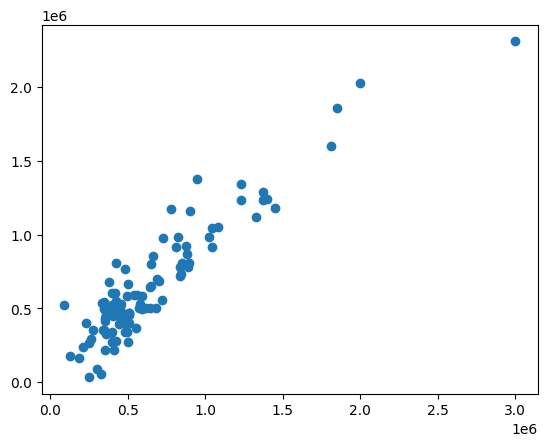

In [40]:
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred)

In [41]:
## Residuals
residuals=y_test-y_pred

In [42]:
residuals

983   -245837.265254
433   -163947.116452
453    126779.524786
697     -5384.576122
505     98195.062632
           ...      
851     -4794.136966
415    108990.163893
467   -148816.891851
537     15061.420091
845    -86385.696683
Name: Price, Length: 103, dtype: float64

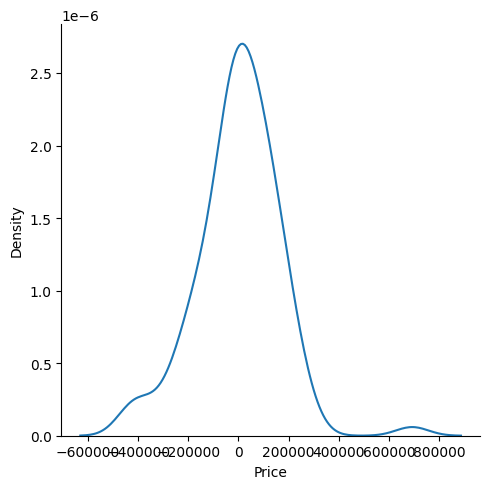

In [43]:
## Plot this residuals 
import seaborn as sns
sns.displot(residuals,kind="kde")

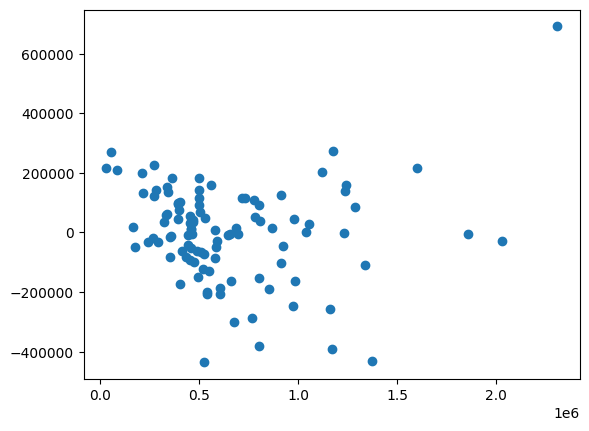

In [44]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred,residuals)

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

118979.82708479305
26579949689.65524
163033.584545195


In [46]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.857775837099677


In [47]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8504446946821346

In [48]:
X_test

,Name,Company,Year,Kms_driven,Fuel_type
983,Ford Ecosport,Ford,2018,8925,Petrol
433,Maruti Suzuki Alto,Maruti,2019,14179,Petrol
453,Tata Nexon,Tata,2020,12978,Petrol
697,Maruti Suzuki Wagon,Maruti,2017,81811,Petrol
505,Hyundai Grand i10,Hyundai,2015,39836,Petrol
...,...,...,...,...,...
851,Maruti Suzuki Swift,Maruti,2018,35000,Petrol
415,Honda City,Honda,2017,33598,Petrol
467,Chevrolet Cruze LTZ,Chevrolet,2011,115000,Diesel
537,Maruti Suzuki Vitara,Maruti,2019,31803,Diesel


In [49]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([712148.34776291])

In [50]:
X_test

,Name,Company,Year,Kms_driven,Fuel_type
983,Ford Ecosport,Ford,2018,8925,Petrol
433,Maruti Suzuki Alto,Maruti,2019,14179,Petrol
453,Tata Nexon,Tata,2020,12978,Petrol
697,Maruti Suzuki Wagon,Maruti,2017,81811,Petrol
505,Hyundai Grand i10,Hyundai,2015,39836,Petrol
...,...,...,...,...,...
851,Maruti Suzuki Swift,Maruti,2018,35000,Petrol
415,Honda City,Honda,2017,33598,Petrol
467,Chevrolet Cruze LTZ,Chevrolet,2011,115000,Diesel
537,Maruti Suzuki Vitara,Maruti,2019,31803,Diesel


In [51]:
y_pred

array([ 973136.26525436,  662746.11645193,  916519.47521429,
        465683.57612184,  397103.93736777,  730690.93743937,
       1235984.37959623,  538944.6043212 ,  803575.58023861,
        500895.18443197,  452784.92370255,   33713.94690241,
        342816.50637423,  985656.82471898,  499591.52608295,
       1042530.61798367,  528892.74232292,  468558.99627464,
        805082.71002208,  559728.49542488,  272959.59359613,
        606249.34835885,  281582.13511764,  912817.50533138,
        446369.01540895,  476493.28913242,  511874.1080399 ,
        921741.6716976 ,  394112.36858332, 1375294.69043934,
        337257.70665942,  354357.62288822,  402970.50890519,
        488621.85892436,  413014.09840964, 2307239.11040194,
        167000.11583692,  176167.15959783,  804397.16504805,
        647059.86442216,  332035.17741632,  453094.27810556,
        325262.49982066, 1159299.52975592, 1170405.94323543,
        716540.21102339,  218892.13484168, 1177606.76959679,
        269225.33589256,

In [52]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Baleno','Maruti',2016,48329,'Petrol']).reshape(1,5)))

array([500372.26552893])

In [53]:
import pickle
#open a file, where we want to store the data
regmodel = open('regmodel.pkl', 'wb')

# dump information to that file
pickle.dump(pipe, regmodel)

In [54]:
pipe.predict(pd.DataFrame(columns=['Name','Company','Year','Kms_driven','Fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))


array([712148.34776291])